<a href="https://colab.research.google.com/github/Randasabag/P10/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation du jeu de données</a>
 
**Partie 2 : Analyse du jeu de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes</a>
 - <a href="#C4">Affichage des informations</a>
 - <a href="#C5">Analyse des doublons</a>
 - <a href="#C6">Analyse des valeurs manquantes</a>
 - <a href="#C7"></a>
 - <a href="#C8"></a>
 - <a href="#C9">Calcul de nouveaux indicateurs</a>
 - <a href="#C10">Indicateurs choisis</a>


**Partie 3 : Analyse univariée des indicateurs**
 - <a href="#C11">Disponibilité alimentaire</a>
 - <a href="#C12">Ratio protéine animale/disponibilité protéine totale</a>
 - <a href="#C13">Taux d'importation / disponibilité intérieure</a>
 - <a href="#C14">PIB/Habitant</a>
 - <a href="#C15">Evolution de la Population 2007-2017</a>
 - <a href="#C16">Taux de production / disponibilité intérieure</a>
 - <a href="#C17">Indice de stabilité politique</a>


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C18">Disponibilité alimentaire - Ratio protéine animale</a>
 - <a href="#C19">Disponibilité alimentaire - Taux d'importation</a>
 - <a href="#C20">Disponibilité alimentaire - Taux de Production</a>
 - <a href="#C21">Taux d'importation - Taux de Production</a>
 - <a href="#C22">Ratio protéine animale - Indice de stabilité politique</a>
 - <a href="#C23">Indice de stabilité politique - PIB par Habitant</a>

**Partie 5 : Classification** 
 - <a href="#C24">Classification Ascendante Hiérarchique (CAH)</a>
 - <a href="#C25">Analyse en Composantes Principales (PCA)</a>
 - <a href="#C26">K-Means</a>
 - <a href="#C27">Analyse en Composantes Principales (PCA)</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import io
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [ ]:
uploaded = files.upload()

Saving billets.xlsx to billets.xlsx


In [54]:
#Billets
df_billets=pd.read_excel(io.BytesIO(uploaded['billets.xlsx'])) 
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# **<font color='indianred'>Partie 2 : Analyse du jeu de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes</font></a>

In [55]:
#nombre de lignes et colonnes
print('Billets',df_billets.shape)

Billets (1500, 7)


## <a name="C4"><font color='LightSeaGreen'>Affichage des informations</font></a>

In [56]:
print('Table billets')
df_billets.info()

Table billets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


###<font color='purple'>Changement des valeurs de la variable is_genuine en 0 et 1</font>

In [57]:
df_billets.replace({True : 1 , False : 0})

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [58]:
df_billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Il y a 1000 vrais billets et 500 faux billets.

###<font color='purple'>Analyse statistique</font>

In [59]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [60]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [61]:
detect_doublons(df_billets)

------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []




## <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [62]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [63]:
val_manq(df_billets)

Nombre de valeurs manquantes = 37
Nombre de cellulles totales = 10500
Pourcentage de valeurs manquantes =  0.35 %




Pourcentage de valeurs manquantes par variable/colonne =
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
margin_low      37
dtype: int64




###<font color='purple'>Imputation par la moyenne</font>

In [64]:
#calcul de la moyenne de la variable margin_low
moyenne_marge_bas=round(df_billets['margin_low'].mean(),2)
moyenne_marge_bas

4.49

In [73]:
#lignes où il y a au moins une valeur nulle
df_billets[df_billets.isnull().any(axis=1)].head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [70]:
#remplacement des valeurs nulles par la moyenne de margin_low
df_billets=df_billets.fillna(moyenne_marge_bas)

In [72]:
#vérification
df_billets[df_billets.index==72]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.49,3.25,112.79


# **<font color='indianred'>Partie 3 : Analyse univariée des variables</font>**

## <a name="C11"><font color='LightSeaGreen'>diagonal</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

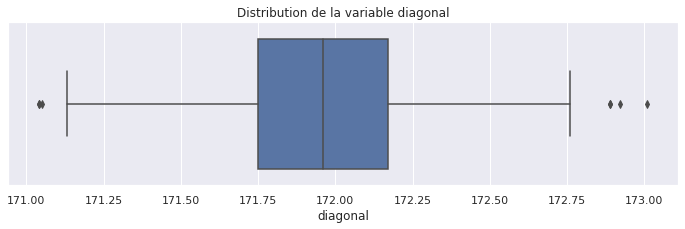

In [75]:
#Représentation la variable diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["diagonal"], color="b")
plt.title('Distribution de la variable diagonal')
plt.savefig("distribution_diagonal_boxplot.png")
plt.show

On voit 5 outliers pour la variable diagonal.

## <a name="C11"><font color='LightSeaGreen'>height_left</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

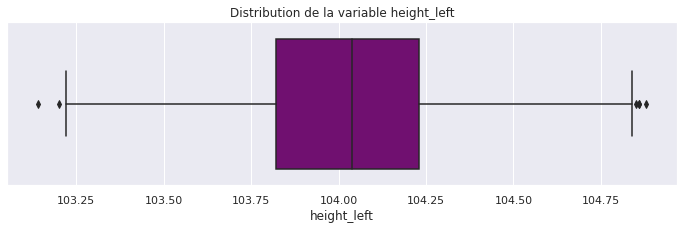

In [76]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_left"], color="purple")
plt.title('Distribution de la variable height_left')
plt.savefig("distribution_height_left_boxplot.png")
plt.show

On voit 5 outliers pour la variable height_left

## <a name="C11"><font color='LightSeaGreen'>height_right</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

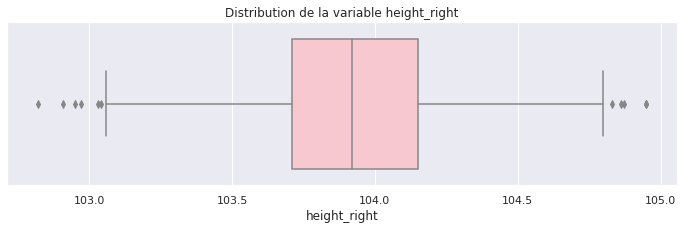

In [78]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_right"], color="pink")
plt.title('Distribution de la variable height_right')
plt.savefig("distribution_height_right_boxplot.png")
plt.show

Il y a 10 outliers pour la variable height_right.

## <a name="C11"><font color='LightSeaGreen'>margin_low</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

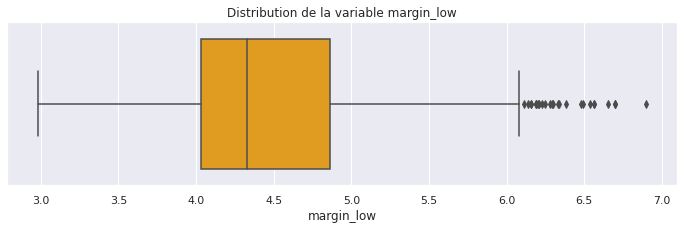

In [80]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_low"], color="orange")
plt.title('Distribution de la variable margin_low')
plt.savefig("distribution_margin_low_boxplot.png")
plt.show

On voit beaucoup d'outliers pour la variable margin_low. On va les analyser en détail.

## <a name="C11"><font color='LightSeaGreen'>margin_up</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

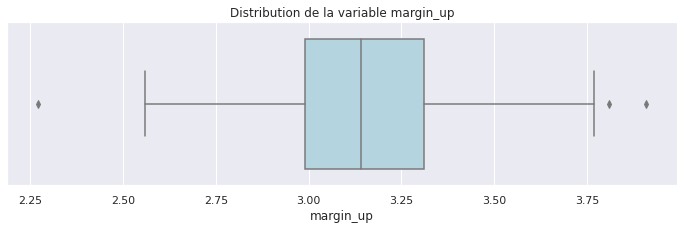

In [82]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_up"], color="lightblue")
plt.title('Distribution de la variable margin_up')
plt.savefig("distribution_margin_up_boxplot.png")
plt.show

On voit 3 outliers pour la variable margin_up.

## <a name="C11"><font color='LightSeaGreen'>length</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

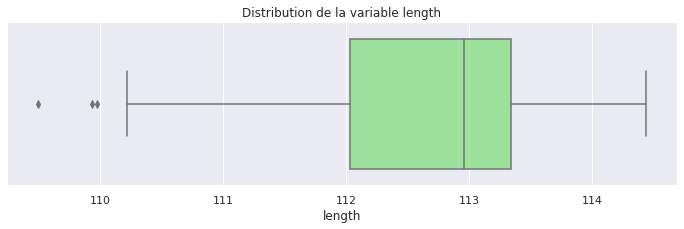

In [84]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["length"], color="lightgreen")
plt.title('Distribution de la variable length')
plt.savefig("distribution_length_boxplot.png")
plt.show

On voit 3 outliers pour la variable length.